### Sequential Sampling

sciope supports space-filling sequential sampling. In this notebook we start with an $initial$ latin hypercube design and refine it using space-filling $maximin$ sampling.

In [1]:
# imports
from sciope.designs import latin_hypercube_sampling as lhs
from sciope.sampling import maximin_sampling as ms

Generate 25 samples in a 2D space using each design. First we define the sampling space as a bounding box.

In [2]:
# Sample space
dmin = [0, 0]
dmax = [1, 1]

Instantiate the LHD.

In [3]:
lhs_sampler = lhs.LatinHypercube(dmin, dmax)

Generate 25 samples.

In [4]:
lhs_samples = lhs_sampler.generate(n=25)

The LHD sampler returns Dask delayed objects, so we compute them now.

In [5]:
# Imports
import matplotlib.pyplot as plt
import dask
from dask.distributed import Client
import numpy as np

# Start a dask cluster for computations
c = Client()

# LHS return Dask delayed objects, so we compute them
lhs_samples ,= dask.compute(lhs_samples)

This is how the samples look like.

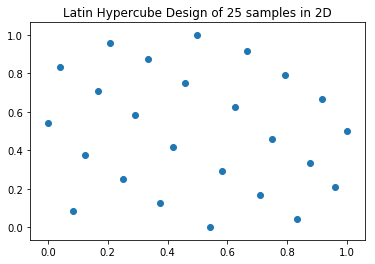

In [6]:
# The space-filling non-collapsable latin hypercube design
plt.scatter(lhs_samples[:, 0], lhs_samples[:, 1])
plt.title('Latin Hypercube Design of 25 samples in 2D')
plt.show()

Now we generate 20 additional samples using sequential sampling with the $maximin$ sampling algorithm. We instantiate the object first.

In [7]:
maximin_sampler = ms.MaximinSampling(dmin, dmax)

Generate the 20 samples to add to 'lhs_samples'.

In [8]:
maximin_samples = maximin_sampler.select_points(lhs_samples, n=20)
maximin_samples ,= dask.compute(maximin_samples)
maximin_samples = np.asarray(maximin_samples).reshape(20, 2)

Plot the old and new samples.

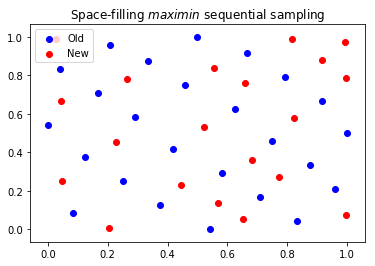

In [9]:
# Plot
plt.scatter(lhs_samples[:, 0], lhs_samples[:, 1], label='Old', color='b')
plt.scatter(maximin_samples[:, 0], maximin_samples[:, 1], label='New', color='r')
plt.legend()
plt.title('Space-filling $maximin$ sequential sampling')
plt.show()